# Global sea level budget
Check how the components add up

In [17]:
import sys
sys.path.append('../code')
import importlib

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cftime

import SeaLevelContrib as slc

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [18]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewilebars/Projects/SLBudget/notebooks/../code/SeaLevelContrib.py'>

## Look at the global budget using different sources of data

In [3]:
def deep_steric_PJ10(first_year, last_year):
    '''Deep ocean bellow 2000m contribution to global mean sea level in cm/year,
    from Purkey and Johnson 0.1mm/year'''
    
    deep_steric = (np.arange(first_year,last_year) - first_year)*0.01
    deep_steric_df = pd.DataFrame(data={'time':np.arange(first_year,last_year), 
                                        'deep_steric':deep_steric})
    deep_steric_df = deep_steric_df.set_index('time')
    return deep_steric_df

<AxesSubplot: xlabel='time'>

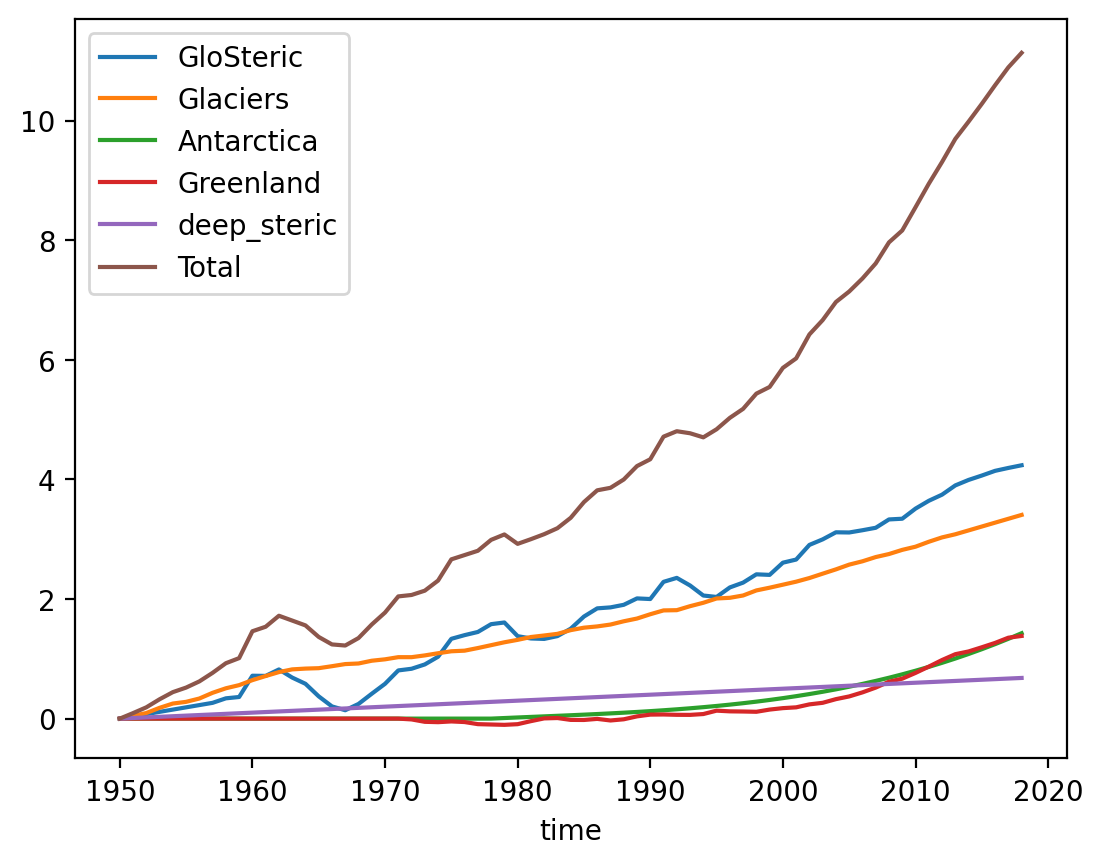

In [4]:
GloSLDang19_df = slc.GloSLDang19()

glac_df = slc.glaciers_m15(tg_id = None, extrap=True, del_green=True)
ant_df = slc.ant_rignot19()  #imbie or rignot19
#ant_df = slc.ant_imbie_glo(extrap=True) 
green_df = slc.green_mouginot19_glo()
tws_df = slc.tws_glo_humphrey19()

deep_steric_df = deep_steric_PJ10(1950, 2020)

sealevel_df = slc.LevitusSL(extrap_back = True)
# Extrapollate to 1950?
#sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, tws_df], how='inner')
sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, deep_steric_df], how='inner')
sealevel_df = sealevel_df - sealevel_df.loc[1950]

sealevel_df['Total'] = sealevel_df.sum(axis=1)
sealevel_df.index.names = ['time']

sealevel_df.plot()

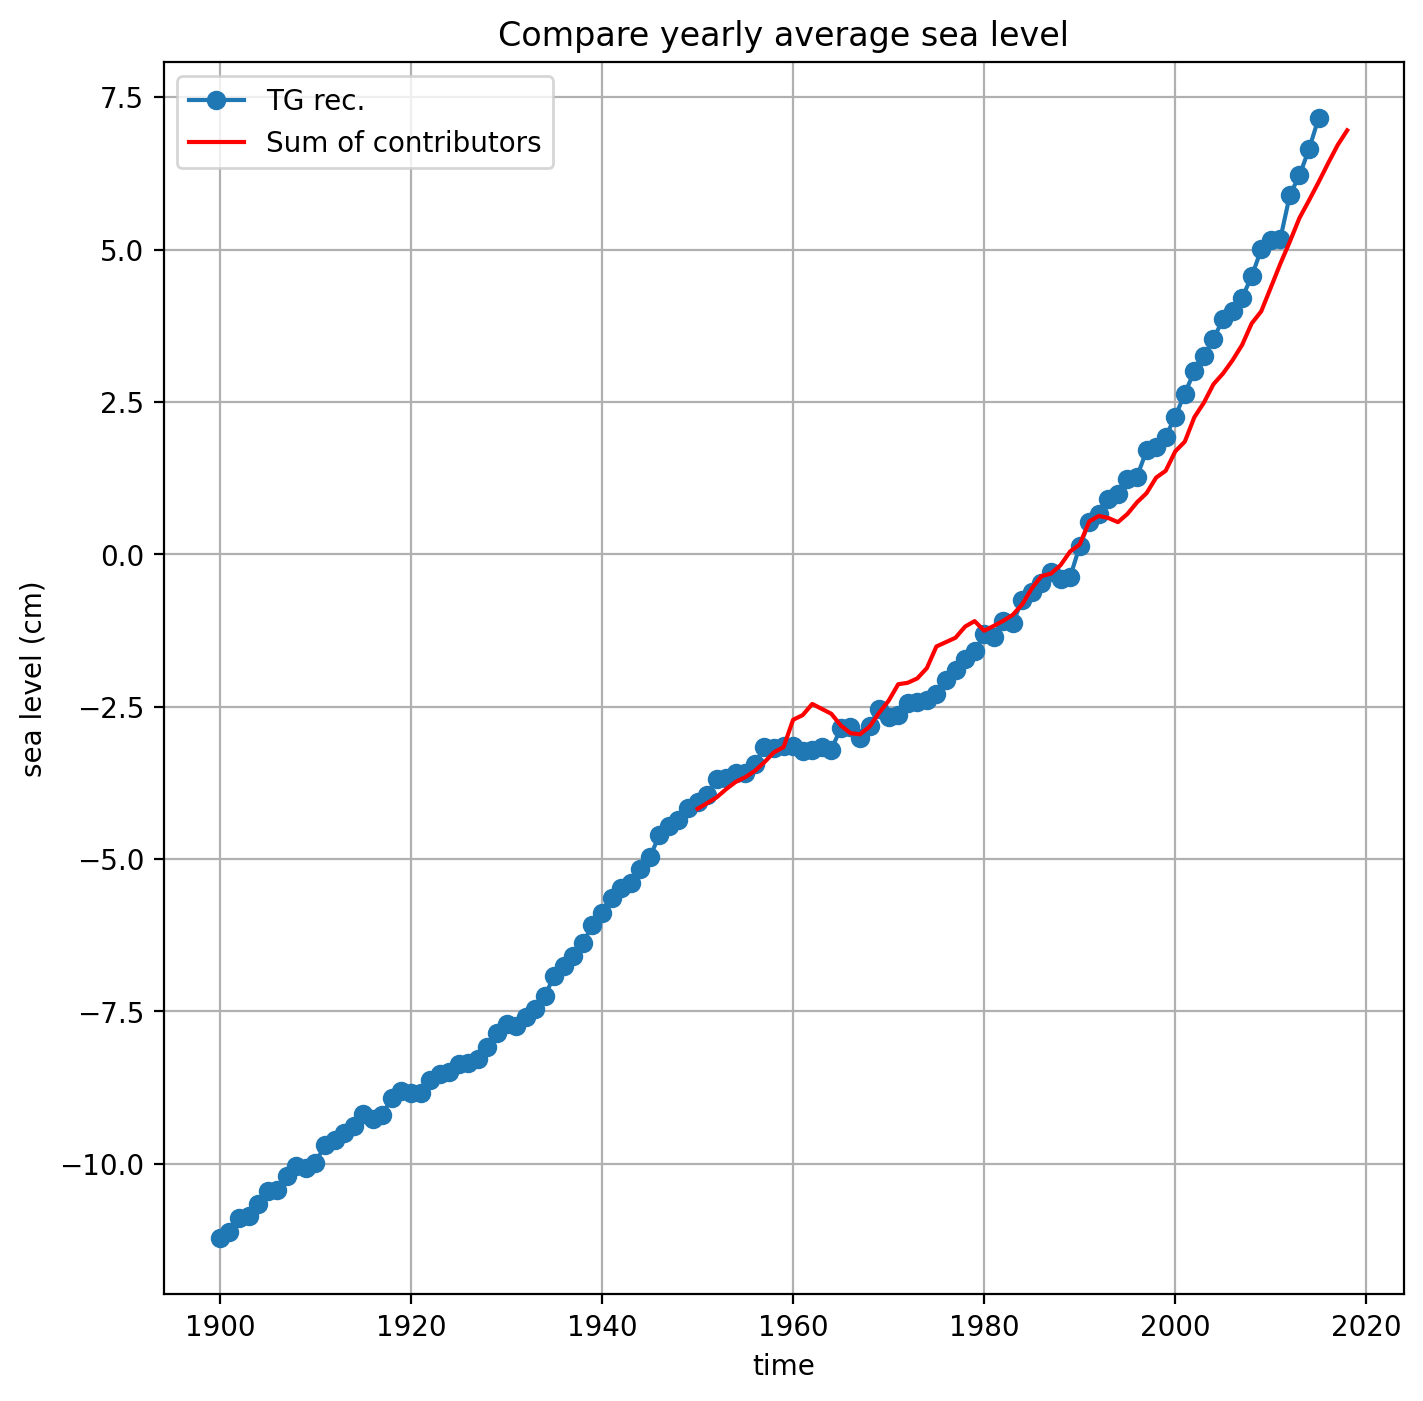

In [5]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GloSLDang19_df - GloSLDang19_df.loc[1953:2018].mean(), 'o-', label='TG rec.')
ax.plot(sealevel_df.Total - sealevel_df.Total.mean() , 'r-', label='Sum of contributors')

#ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare yearly average sea level')
ax.grid(True)
plt.legend(loc='upper left')

The sum of contributors is not high enough compared to the reconstruction. Could missing glaciers and deep ocean fill the gap?
Deep ocean OHC increase is around 5% of the top 2000m (Zanna et al. 2019 consistent with Gebbie et al. 2019) . This is not enough to bridge the gap.

## Global budget using Frederikse et al. 2020 data

In [6]:
fts = pd.read_excel('../data/Frederikse2020/global_basin_timeseries.xlsx', sheet_name='Global')
fts = fts.rename(columns = {fts.columns[0]:'time'})
fts = fts.set_index('time')
fts.index = fts.index +0.5
fts

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [lower],Sum of contributors [mean],Sum of contributors [upper],Steric [lower],Steric [mean],Steric [upper],Glaciers [lower],...,Reservoir impoundment [upper],Groundwater depletion [lower],Groundwater depletion [mean],Groundwater depletion [upper],Natural TWS [lower],Natural TWS [mean],Natural TWS [upper],Altimetry [lower],Altimetry [mean],Altimetry [upper]
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-203.557267,-173.261442,-141.002807,-199.227905,-173.090775,-146.755371,-58.666306,-48.279350,-37.552917,-95.500000,...,34.349998,-16.549999,-12.482123,-8.20,-3.90,-2.063471,0.0,NaN,NaN,NaN
1901.5,-201.018509,-168.801675,-135.897609,-195.460754,-170.245468,-144.462433,-58.755146,-49.144897,-38.849602,-94.599998,...,34.349998,-16.500000,-12.455986,-8.20,-1.25,0.809499,3.0,NaN,NaN,NaN
1902.5,-212.074044,-180.389967,-148.213824,-193.369812,-168.421829,-142.791672,-59.155018,-49.877560,-39.888828,-93.500000,...,34.299999,-16.500000,-12.428749,-8.15,0.00,2.109289,4.4,NaN,NaN,NaN
1903.5,-202.697564,-170.267832,-138.930518,-193.189880,-168.557556,-143.225800,-60.985012,-51.100590,-40.815861,-92.849998,...,34.299999,-16.450001,-12.399526,-8.15,0.00,2.142349,4.6,NaN,NaN,NaN
1904.5,-200.167015,-168.720071,-137.450122,-193.112183,-168.372360,-142.754593,-62.585712,-52.240177,-41.379253,-91.800003,...,34.299999,-16.400000,-12.370537,-8.10,-0.30,1.730843,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.5,3.502924,11.868936,20.258065,10.868380,12.164775,13.248381,4.308544,4.670032,5.028707,2.450000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.597370,12.316882,15.094145
2015.5,9.216259,17.869521,26.591747,18.938299,20.688692,22.158627,5.933526,6.744699,7.239516,3.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.347687,23.342237,26.391973
2016.5,15.510550,23.941862,32.672989,21.122080,23.292170,25.237761,5.686140,6.472463,7.420359,3.850000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.668184,25.728231,28.832306


In [7]:
# Read the AR5 sea level projections
SCE = 'rcp45' # 'rcp26', 'rcp45', 'rcp60', 'rcp85'
# Old path:
#path_ar5_proj = '~/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Final_Projections/'
# Freshely downloaded path: http://www.climatechange2013.org/report/full-report/
path_ar5_proj = '~/Projects/Project_ProbSLR/Data_Proj/Data_AR5/WG1AR5_Ch13SM_datafiles/13.SM.1/'
ar5_proj = xr.open_dataset(f'{path_ar5_proj}{SCE}_sumlower.nc')
ar5_proj_df = pd.DataFrame({'time': 2006.5 + np.arange(len(ar5_proj.time))})

for contrib in ['sum', 'antdyn', 'antsmb', 'expansion', 'glacier', 'greendyn', 
                'greensmb', 'landwater']:
    for filen in [f'{SCE}_{contrib}lower', f'{SCE}_{contrib}mid', 
                  f'{SCE}_{contrib}upper']:
        ar5_proj = xr.open_dataset(f'{path_ar5_proj}{filen}.nc')
        ar5_proj_df[filen] = ar5_proj.global_average_sea_level_change

ar5_proj_df = ar5_proj_df.set_index('time')
ar5_proj_df = ar5_proj_df*100 # Convert from m to cm


In [8]:
ar5_proj_df

,rcp45_sumlower,rcp45_summid,rcp45_sumupper,rcp45_antdynlower,rcp45_antdynmid,rcp45_antdynupper,rcp45_antsmblower,rcp45_antsmbmid,rcp45_antsmbupper,rcp45_expansionlower,...,rcp45_glacierupper,rcp45_greendynlower,rcp45_greendynmid,rcp45_greendynupper,rcp45_greensmblower,rcp45_greensmbmid,rcp45_greensmbupper,rcp45_landwaterlower,rcp45_landwatermid,rcp45_landwaterupper
time,,,,,,,,,,,,,,,,,,,,,
2006.5,2.474571,3.153517,3.790679,0.270528,0.291475,0.312422,-0.018906,-0.007650,-0.000886,0.823883,...,1.322468,0.168414,0.177101,0.185787,0.149072,0.156898,0.173014,0.026543,0.038110,0.049677
2007.5,2.709736,3.510992,4.251673,0.290110,0.333899,0.377689,-0.037010,-0.014537,-0.000925,0.943130,...,1.537088,0.191155,0.208902,0.226650,0.151855,0.167401,0.199299,0.052170,0.076440,0.100710
2008.5,2.930905,3.883757,4.765600,0.308749,0.377274,0.445799,-0.056560,-0.022317,-0.001590,1.028416,...,1.734044,0.213724,0.240905,0.268087,0.155245,0.178952,0.227670,0.076883,0.114990,0.153097
2009.5,3.128190,4.248186,5.269444,0.326442,0.421598,0.516754,-0.079909,-0.030546,-0.000529,1.134607,...,1.940068,0.236120,0.273110,0.310099,0.157061,0.191127,0.260862,0.100681,0.153760,0.206839
2010.5,3.387735,4.631002,5.768739,0.343190,0.466872,0.590553,-0.103487,-0.039772,-0.001049,1.259880,...,2.131455,0.258344,0.305515,0.352687,0.160380,0.204443,0.294781,0.123564,0.192750,0.261936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095.5,34.231018,50.355194,67.429672,-1.686324,7.786491,17.259308,-5.571875,-2.696854,-0.876120,14.840653,...,19.338850,1.516971,3.795450,6.073929,1.709415,4.410976,10.317508,-1.275325,4.310905,9.897134
2096.5,34.578812,50.951130,68.282974,-1.750826,7.913444,17.577715,-5.660884,-2.743027,-0.893935,14.969824,...,19.540779,1.524362,3.845162,6.165960,1.742449,4.489833,10.495715,-1.331123,4.368812,10.068748
2097.5,34.937756,51.574306,69.184059,-1.816272,8.041347,17.898966,-5.749398,-2.788507,-0.910100,15.109086,...,19.739004,1.531580,3.895073,6.258565,1.772725,4.566470,10.672791,-1.387836,4.426939,10.241715


In [9]:
cts_df = fts[['Observed GMSL [lower]', 'Observed GMSL [mean]', 'Observed GMSL [upper]']]
cts_df = cts_df - cts_df['Observed GMSL [mean]'].loc[1986:2006].mean()
cts_df['Sum of contributors [mean]'] = (fts['Sum of contributors [mean]'] - 
                                         fts['Sum of contributors [mean]'].loc[1986:2006].mean())
cts_df = cts_df/10 #Convert from mm to cm
cts_df = pd.concat([cts_df, ar5_proj_df], axis=1, join='outer')
cts_df

,Observed GMSL [lower],Observed GMSL [mean],Observed GMSL [upper],Sum of contributors [mean],rcp45_sumlower,rcp45_summid,rcp45_sumupper,rcp45_antdynlower,rcp45_antdynmid,rcp45_antdynupper,...,rcp45_glacierupper,rcp45_greendynlower,rcp45_greendynmid,rcp45_greendynupper,rcp45_greensmblower,rcp45_greensmbmid,rcp45_greensmbupper,rcp45_landwaterlower,rcp45_landwatermid,rcp45_landwaterupper
time,,,,,,,,,,,,,,,,,,,,,
1900.5,-16.039829,-13.010247,-9.784383,-13.210246,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901.5,-15.785954,-12.564270,-9.273864,-12.925716,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902.5,-16.891507,-13.723099,-10.505485,-12.743352,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903.5,-15.953859,-12.710886,-9.577154,-12.756925,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904.5,-15.700804,-12.556110,-9.429115,-12.738405,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095.5,NaN,NaN,NaN,NaN,34.231018,50.355194,67.429672,-1.686324,7.786491,17.259308,...,19.338850,1.516971,3.795450,6.073929,1.709415,4.410976,10.317508,-1.275325,4.310905,9.897134
2096.5,NaN,NaN,NaN,NaN,34.578812,50.951130,68.282974,-1.750826,7.913444,17.577715,...,19.540779,1.524362,3.845162,6.165960,1.742449,4.489833,10.495715,-1.331123,4.368812,10.068748
2097.5,NaN,NaN,NaN,NaN,34.937756,51.574306,69.184059,-1.816272,8.041347,17.898966,...,19.739004,1.531580,3.895073,6.258565,1.772725,4.566470,10.672791,-1.387836,4.426939,10.241715


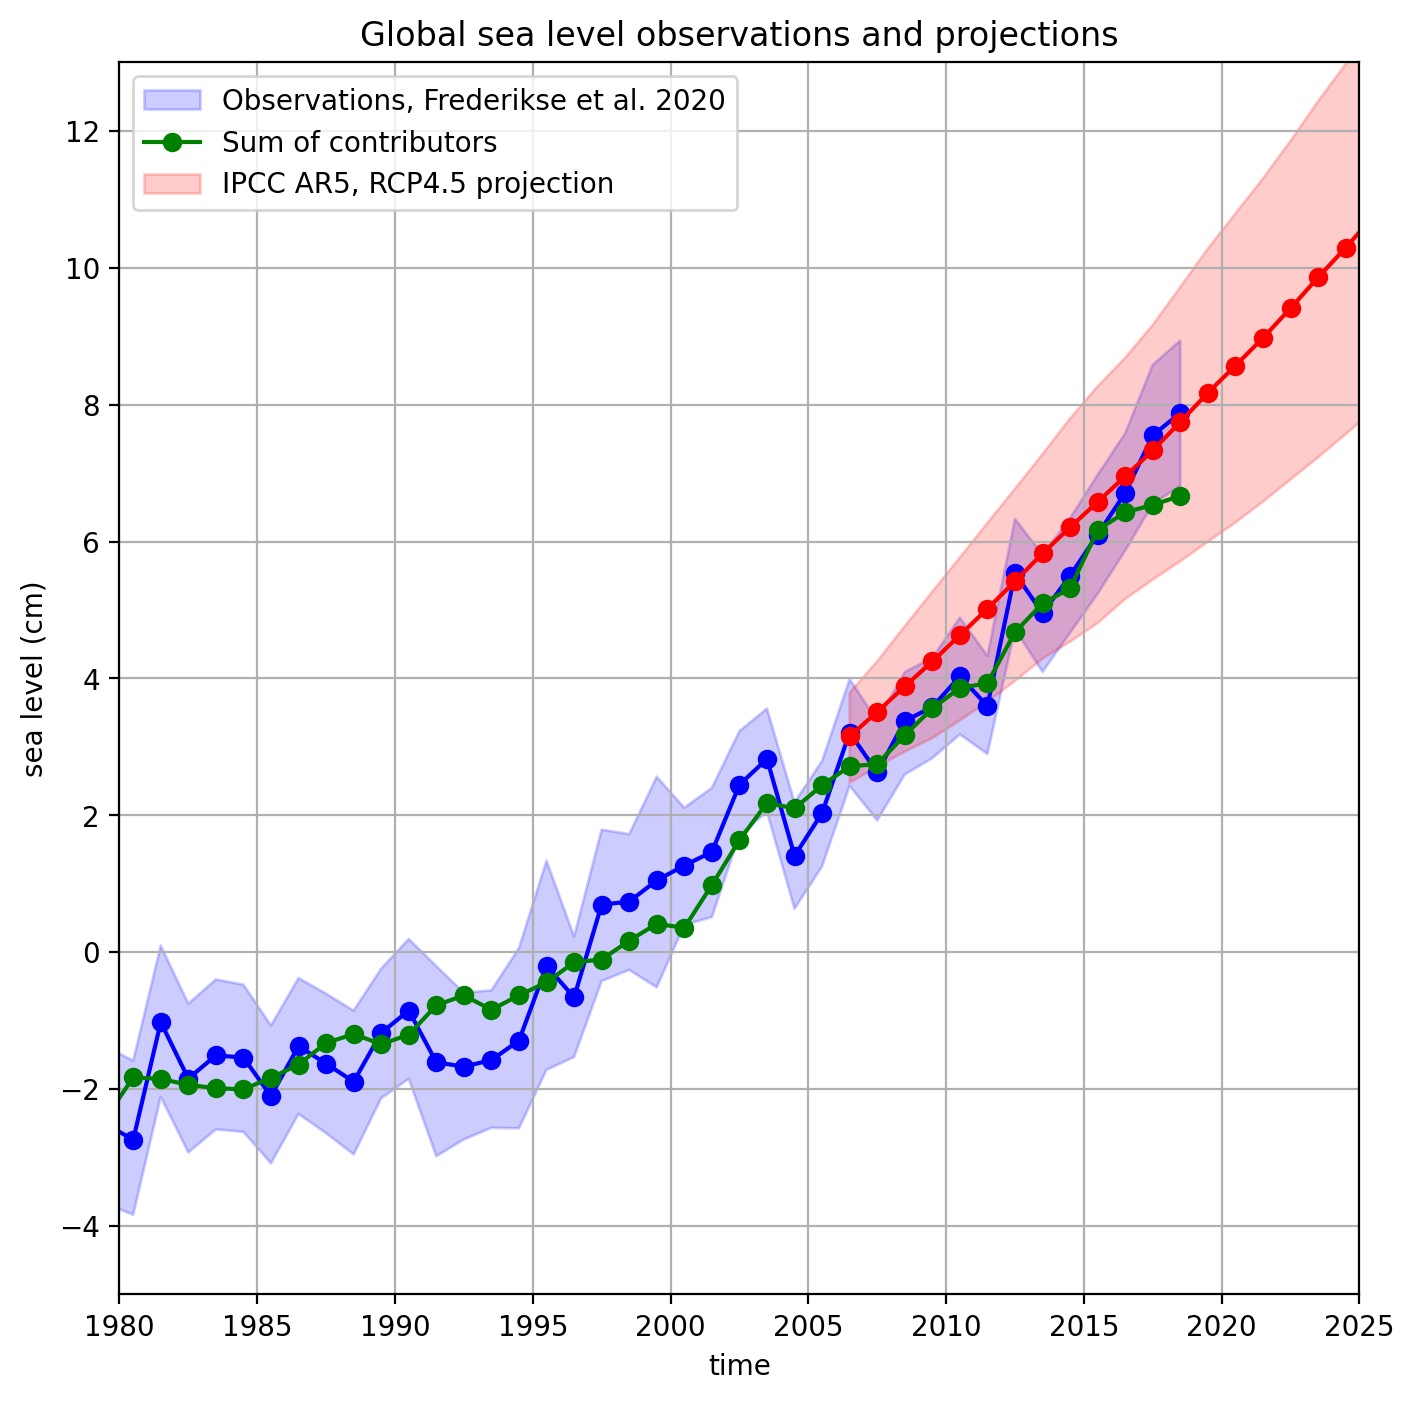

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

ax.fill_between(cts_df.index, cts_df['Observed GMSL [lower]'], 
                cts_df['Observed GMSL [upper]'], color='blue',alpha=0.2,
               label='Observations, Frederikse et al. 2020')
ax.plot(cts_df['Observed GMSL [mean]'], 'ob-')

ax.plot(cts_df['Sum of contributors [mean]'], 'og-', label='Sum of contributors')

ax.fill_between(cts_df.index, cts_df['rcp45_sumlower'], 
                cts_df['rcp45_sumupper'], color='red',alpha=0.2,
               label='IPCC AR5, RCP4.5 projection')
ax.plot(cts_df['rcp45_summid'], 'or-')
# ax.text(0.45, -0.08, 'Figure from Dewi Le Bars (KNMI) 3 dec. 2020', 
#        va='top', ha='left', style='italic', transform=ax.transAxes )
#ax.set_aspect(1)
ax.set_xlim([1980,2025])
ax.set_ylim([-5,13])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Global sea level observations and projections')
ax.grid(True)
plt.legend(loc='upper left')

#plt.savefig('../figures/GlobalComparisonProjObs_rcp45.png', dpi=150)

### Make the comparison process by process

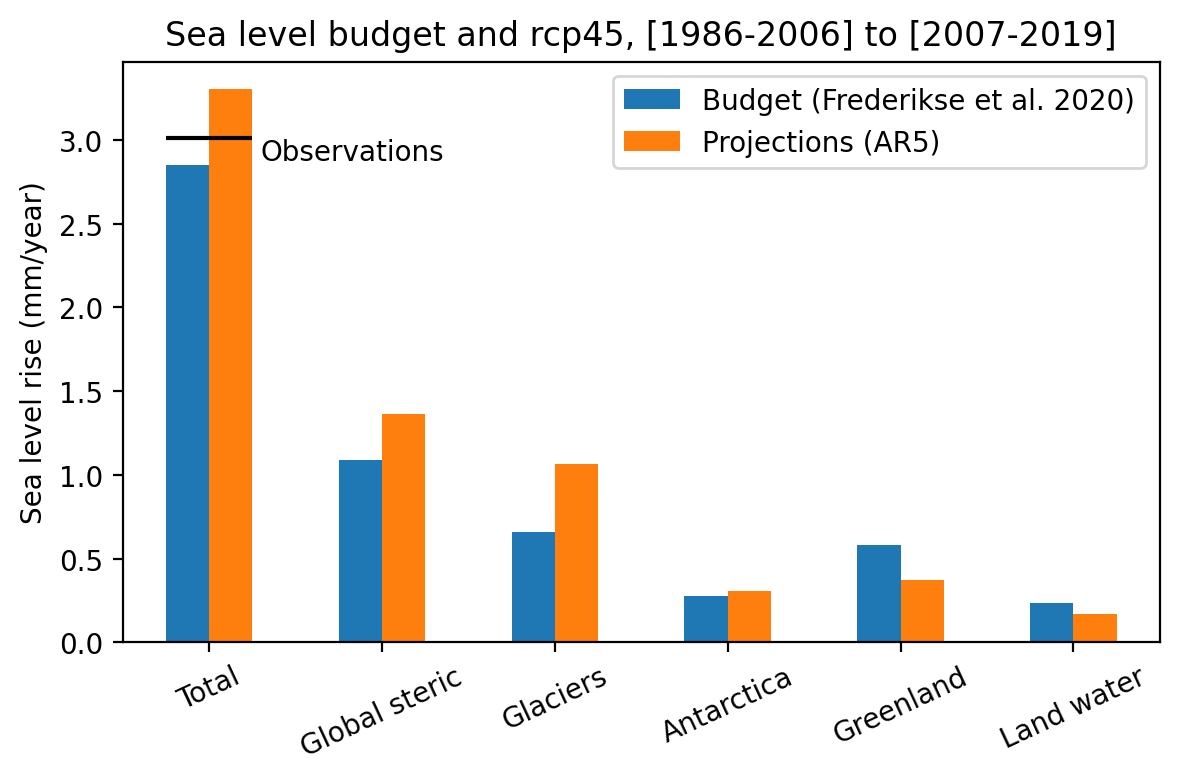

In [11]:
sp = 2007
ep = 2019
ref_s = 1986
ref_e = 2006
tot_years = (sp+ep)/2 - (ref_e+ref_s)/2

# !!! Only works for the mean contribution, for the uncertainty it doesn't
# Multiply by 10 to get mm/yr instead of cm/yr
proj_diff = ar5_proj_df.loc[sp:ep].mean()/tot_years*10
budget_diff = (fts.loc[sp:ep].mean() - fts.loc[ref_s:ref_e].mean())/tot_years

# Build a new dataframe for comparison purposes:
index = ['Total', 'Global steric', 'Glaciers', 'Antarctica', 
         'Greenland', 'Land water']

obs_budget = [budget_diff['Sum of contributors [mean]'], budget_diff['Steric [mean]'],
             budget_diff['Glaciers [mean]'], budget_diff['Antarctic Ice Sheet [mean]'],
             budget_diff['Greenland Ice Sheet [mean]'], budget_diff['Terrestrial Water Storage [mean]']]

proj_diff_ant = proj_diff[f'{SCE}_antdynmid'] + proj_diff[f'{SCE}_antsmbmid']
proj_diff_gre = proj_diff[f'{SCE}_greendynmid'] + proj_diff[f'{SCE}_greensmbmid']
ar5_proj = [proj_diff[f'{SCE}_summid'], proj_diff[f'{SCE}_expansionmid'], 
            proj_diff[f'{SCE}_glaciermid'], proj_diff_ant, proj_diff_gre, 
            proj_diff[f'{SCE}_landwatermid']]

comp_df = pd.DataFrame({'Budget (Frederikse et al. 2020)': obs_budget,
                        'Projections (AR5)': ar5_proj}, index=index)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
comp_df.plot.bar(ax=ax, rot=25)

ax.hlines(y=budget_diff['Observed GMSL [mean]'], xmin=-0.25, xmax=0.25, color='black')
ax.text(0.3, budget_diff['Observed GMSL [mean]'], 'Observations', va='top', ha='left') #transform=ax.transAxes
ax.set_ylabel('Sea level rise (mm/year)')
ax.set_title(f'Sea level budget and {SCE}, ['+str(ref_s)+'-'+str(ref_e)+']'+' to ['+str(sp)+'-'+str(ep)+']' )
# ax.text(0.4, -0.25, 'Figure from Dewi Le Bars (KNMI) 3 dec. 2020', 
#        va='top', ha='left', style='italic', transform=ax.transAxes )
plt.tight_layout()

#plt.savefig(f'../figures/GlobalComparisonBudgetProj_{SCE}.png', dpi=150)

### Look at time series of individual processes from observations

In [12]:
fts.iloc[:,18:]

,Terrestrial Water Storage [lower],Terrestrial Water Storage [mean],Terrestrial Water Storage [upper],Reservoir impoundment [lower],Reservoir impoundment [mean],Reservoir impoundment [upper],Groundwater depletion [lower],Groundwater depletion [mean],Groundwater depletion [upper],Natural TWS [lower],Natural TWS [mean],Natural TWS [upper],Altimetry [lower],Altimetry [mean],Altimetry [upper]
time,,,,,,,,,,,,,,,
1900.5,2.80,12.326826,21.799999,17.1,25.661844,34.349998,-16.549999,-12.482123,-8.20,-3.90,-2.063471,0.0,NaN,NaN,NaN
1901.5,5.75,15.246704,24.700001,17.1,25.648962,34.349998,-16.500000,-12.455986,-8.20,-1.25,0.809499,3.0,NaN,NaN,NaN
1902.5,7.15,16.570808,26.100000,17.1,25.635241,34.299999,-16.500000,-12.428749,-8.15,0.00,2.109289,4.4,NaN,NaN,NaN
1903.5,7.15,16.624289,26.100000,17.1,25.625385,34.299999,-16.450001,-12.399526,-8.15,0.00,2.142349,4.6,NaN,NaN,NaN
1904.5,6.70,16.227045,25.700001,17.1,25.614000,34.299999,-16.400000,-12.370537,-8.10,-0.30,1.730843,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014.5,-1.60,-0.759097,-0.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.597370,12.316882,15.094145
2015.5,2.30,3.344095,4.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.347687,23.342237,26.391973
2016.5,3.65,4.953524,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.668184,25.728231,28.832306


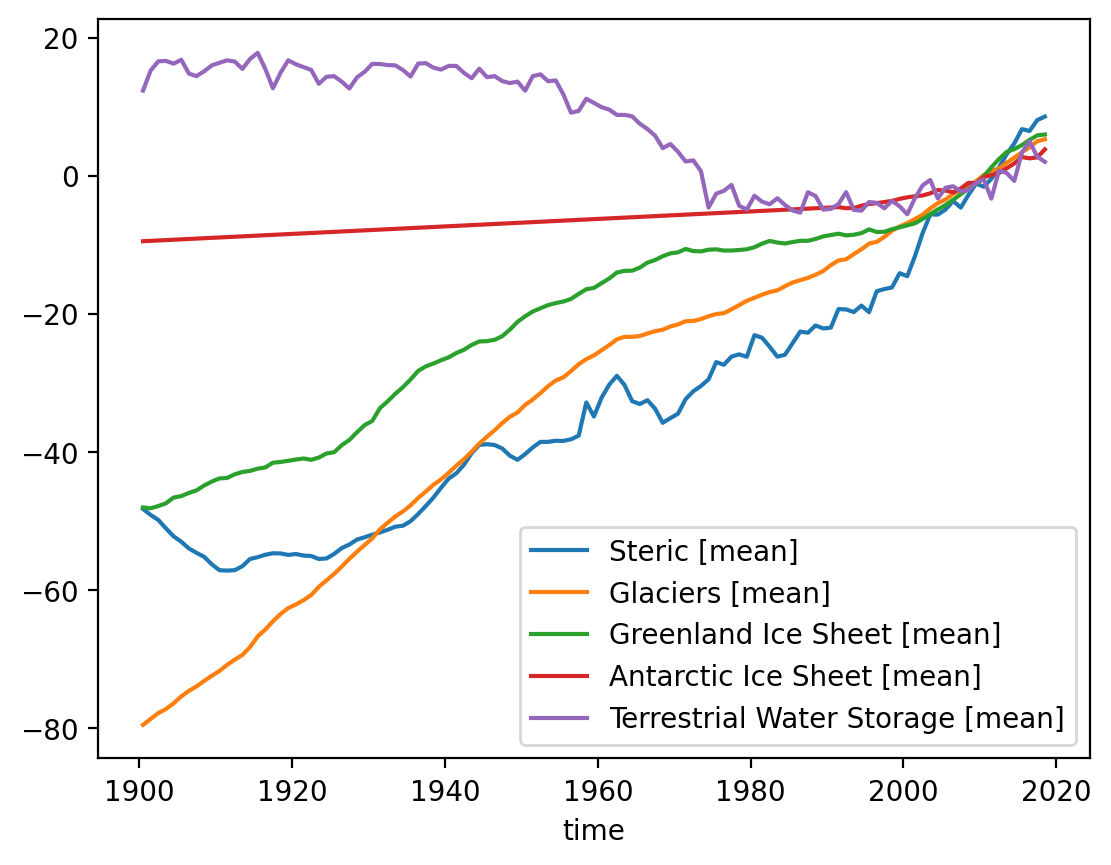

In [13]:
fts['Steric [mean]'].plot()
fts['Glaciers [mean]'].plot()
fts['Greenland Ice Sheet [mean]'].plot()
fts['Antarctic Ice Sheet [mean]'].plot()
fts['Terrestrial Water Storage [mean]'].plot()

plt.legend()

In [19]:
gla = slc.contrib_frederikse2020_glob('glac', extrap=True)
gis = slc.contrib_frederikse2020_glob('GrIS', extrap=True)

aic = slc.contrib_frederikse2020_glob('AIS', extrap=True)
tws = slc.contrib_frederikse2020_glob('tws', extrap=True)


glo_extrap_df = gla.join([gis, aic, tws])

In [ ]:
#glo_extrap_df.to_csv('../outputs/Frederikse2020_global_extrap.csv')

## Compare different global budgets and plot

In [134]:
bar_colors = ["tab:red", "tab:orange", "tab:blue", "tab:blue", "tab:blue", 
              "tab:blue", "tab:blue"]

### Budget from Frederikse et al. 2020

In [98]:
data_mean = np.array([[0.70, 0.52, 0.67], [0.44, 0.30, 0.65], [0.08, 0.13, 0.32],
                    [ -0.21, -0.14, 0.31], [1.00, 0.80, 1.97], [0.52, 0.71, 1.19],
                    [1.52, 1.51, 3.16], [1.56, 1.78, 3.35], [0.04, 0.26, 0.19]])

data_5pc = np.array([[0.52, 0.36, 0.53], [0.35, 0.21, 0.57], [0.00, 0.04, 0.21],
                    [-0.34, -0.31, 0.14], [0.71, 0.49, 1.63], [0.34, 0.54, 0.99],
                    [1.20, 1.18, 2.78], [1.24, 1.48, 2.91], [-0.31, -0.07, -0.32]])

data_95pc = np.array([[0.89, 0.73, 0.84], [0.53, 0.38, 0.74], [0.17, 0.22, 0.44],
                     [-0.08, 0.02, 0.50], [1.31, 1.13, 2.33], [0.69, 0.88, 1.44],
                     [1.85, 1.84, 3.57], [1.89, 2.07, 3.82], [0.41, 0.59, 0.70]])

In [99]:
column_names = ["1900–2018", "1957–2018", "1993–2018"]
row_names = ["Glaciers", "Greenland Ice Sheet", "Antarctic Ice Sheet", "Land-water storage", 
           "Barystatic", "Thermosteric", "Summed contributions", "Observed GMSL", 
           "Observed GMSL minus summed contributions"]

In [100]:
Fred20_mean = pd.DataFrame(
    columns=column_names, 
    index=row_names,
    data = data_mean)

Fred20_5pc = pd.DataFrame(
    columns=column_names, 
    index=row_names,
    data = data_5pc)

Fred20_95pc = pd.DataFrame(
    columns=column_names, 
    index=row_names,
    data = data_95pc)

Fred20_mean

,1900–2018,1957–2018,1993–2018
Glaciers,0.70,0.52,0.67
Greenland Ice Sheet,0.44,0.30,0.65
Antarctic Ice Sheet,0.08,0.13,0.32
Land-water storage,-0.21,-0.14,0.31
Barystatic,1.00,0.80,1.97
Thermosteric,0.52,0.71,1.19
Summed contributions,1.52,1.51,3.16
Observed GMSL,1.56,1.78,3.35
Observed GMSL minus summed contributions,0.04,0.26,0.19


In [110]:
# Reorder the index to make nicer plots
new_index = ["Observed GMSL", "Summed contributions", "Glaciers", "Thermosteric", "Greenland Ice Sheet",
             "Antarctic Ice Sheet", "Land-water storage"]
Fred20_mean_r = Fred20_mean.reindex(new_index)
Fred20_5pc_r = Fred20_5pc.reindex(new_index)
Fred20_95pc_r = Fred20_95pc.reindex(new_index)

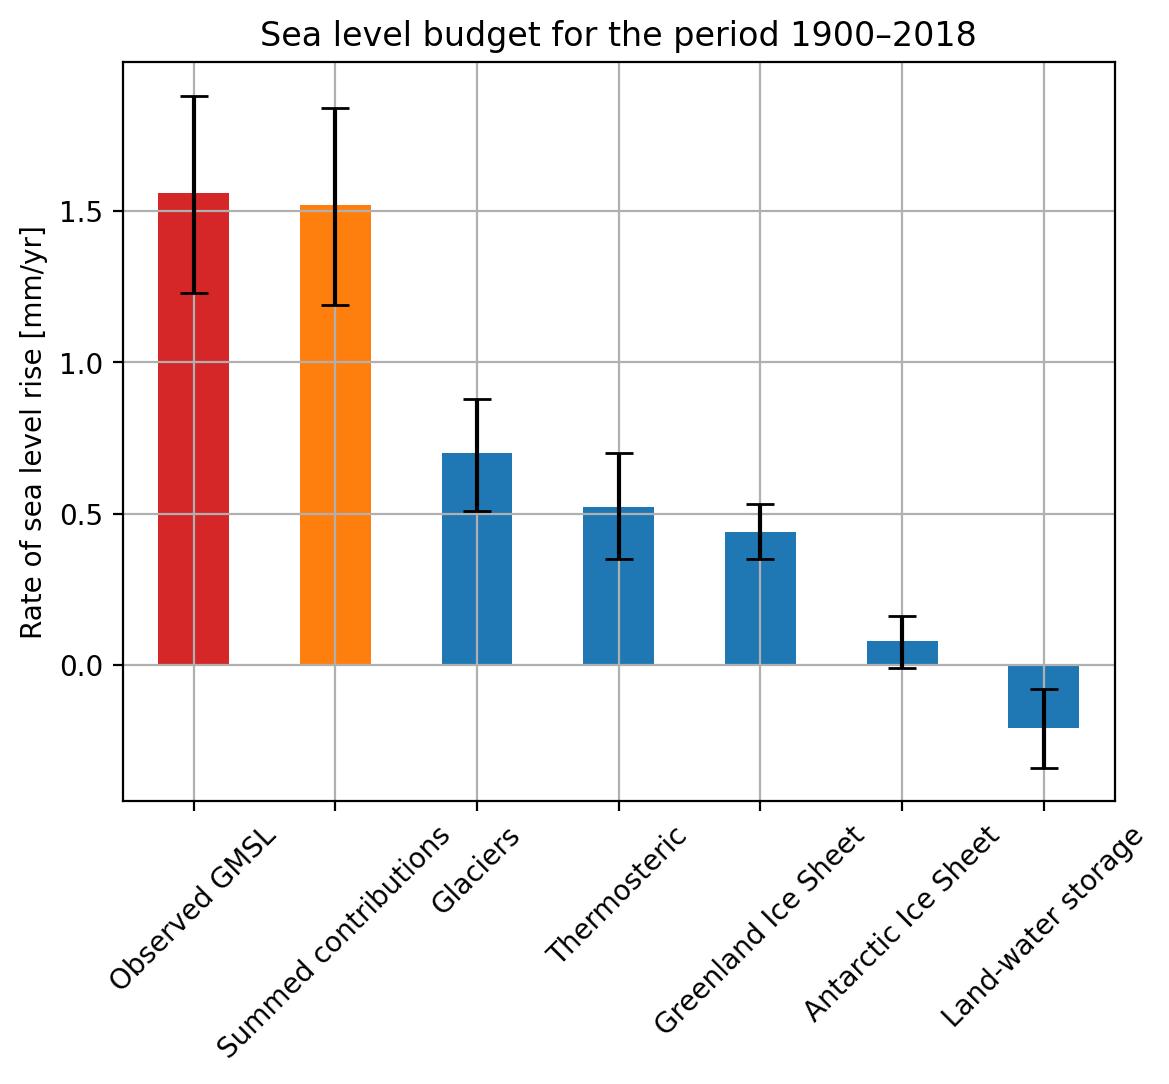

In [137]:
period = "1900–2018"
Fred20_mean_r[period].plot.bar(yerr=[Fred20_95pc_r[period]-Fred20_mean_r[period], 
                                        Fred20_mean_r[period]-Fred20_5pc_r[period]], 
                               title=f"Sea level budget for the period {period}",
                              capsize=5,
                              color=bar_colors)
plt.grid()
plt.ylabel("Rate of sea level rise [mm/yr]")
plt.xticks(rotation=45);

### Budget from AR6

Based on Table 9.6

In [103]:
column_names = ["1901–1990", "1971–2018", "1993–2018", "2006–2018", "1901–2018"]
row_names = ["Thermosteric", "Glaciers", "Greenland Ice Sheet", "Antarctic Ice Sheet", 
             "Land-water storage", "Summed contributions", "Observed GMSL"]


In [104]:
data_mean = [[0.36, 1.01, 1.31, 1.39, 0.54], 
            [0.58, 0.44, 0.55, 0.62, 0.57],
            [0.33, 0.25, 0.43, 0.63, 0.35],
            [0.00, 0.14, 0.25, 0.37, 0.06],
            [-0.15, 0.15, 0.31, 0.60, -0.11],
            [1.11, 2.00, 2.85, 3.61, 1.41],
            [1.35, 2.33, 3.25, 3.69, 1.73]]

data_5pc = [[0.17, 0.73, 0.95, 0.74, 0.40], 
           [0.34, 0.21, 0.40, 0.57, 0.36],
           [0.18, 0.16, 0.36, 0.51, 0.23],
           [-0.10, -0.09, 0.16, 0.24, -0.03],
           [-0.35, -0.05, 0.13, 0.32, -0.39],
           [0.71, 1.52, 2.41, 2.88, 1.00],
           [0.78, 1.55, 2.88, 3.21, 1.28]]

data_95pc = [[0.54, 1.29, 1.66, 2.05, 0.68],
            [0.82, 0.67, 0.70, 0.68, 0.79],
            [0.47, 0.34, 0.51, 0.74, 0.46],
            [0.11, 0.37, 0.33, 0.50, 0.15],
            [0.04, 0.36, 0.49, 0.88, 0.17],
            [1.52, 2.49, 3.29, 4.35, 1.82],
            [1.92, 3.12, 3.61, 4.17, 2.17]]

In [105]:
AR6_mean = pd.DataFrame(
    columns=column_names, 
    index=row_names,
    data = data_mean)

AR6_5pc = pd.DataFrame(
    columns=column_names, 
    index=row_names,
    data = data_5pc)

AR6_95pc = pd.DataFrame(
    columns=column_names, 
    index=row_names,
    data = data_95pc)

AR6_mean

,1901–1990,1971–2018,1993–2018,2006–2018,1901–2018
Thermosteric,0.36,1.01,1.31,1.39,0.54
Glaciers,0.58,0.44,0.55,0.62,0.57
Greenland Ice Sheet,0.33,0.25,0.43,0.63,0.35
Antarctic Ice Sheet,0.00,0.14,0.25,0.37,0.06
Land-water storage,-0.15,0.15,0.31,0.60,-0.11
Summed contributions,1.11,2.00,2.85,3.61,1.41
Observed GMSL,1.35,2.33,3.25,3.69,1.73


In [112]:
# Reorder the index to make nicer plots
#new_index = ["Summed contributions", "Glaciers", "Thermosteric", "Greenland Ice Sheet",
#             "Antarctic Ice Sheet", "Land-water storage"]
AR6_mean_r = AR6_mean.reindex(new_index)
AR6_5pc_r = AR6_5pc.reindex(new_index)
AR6_95pc_r = AR6_95pc.reindex(new_index)

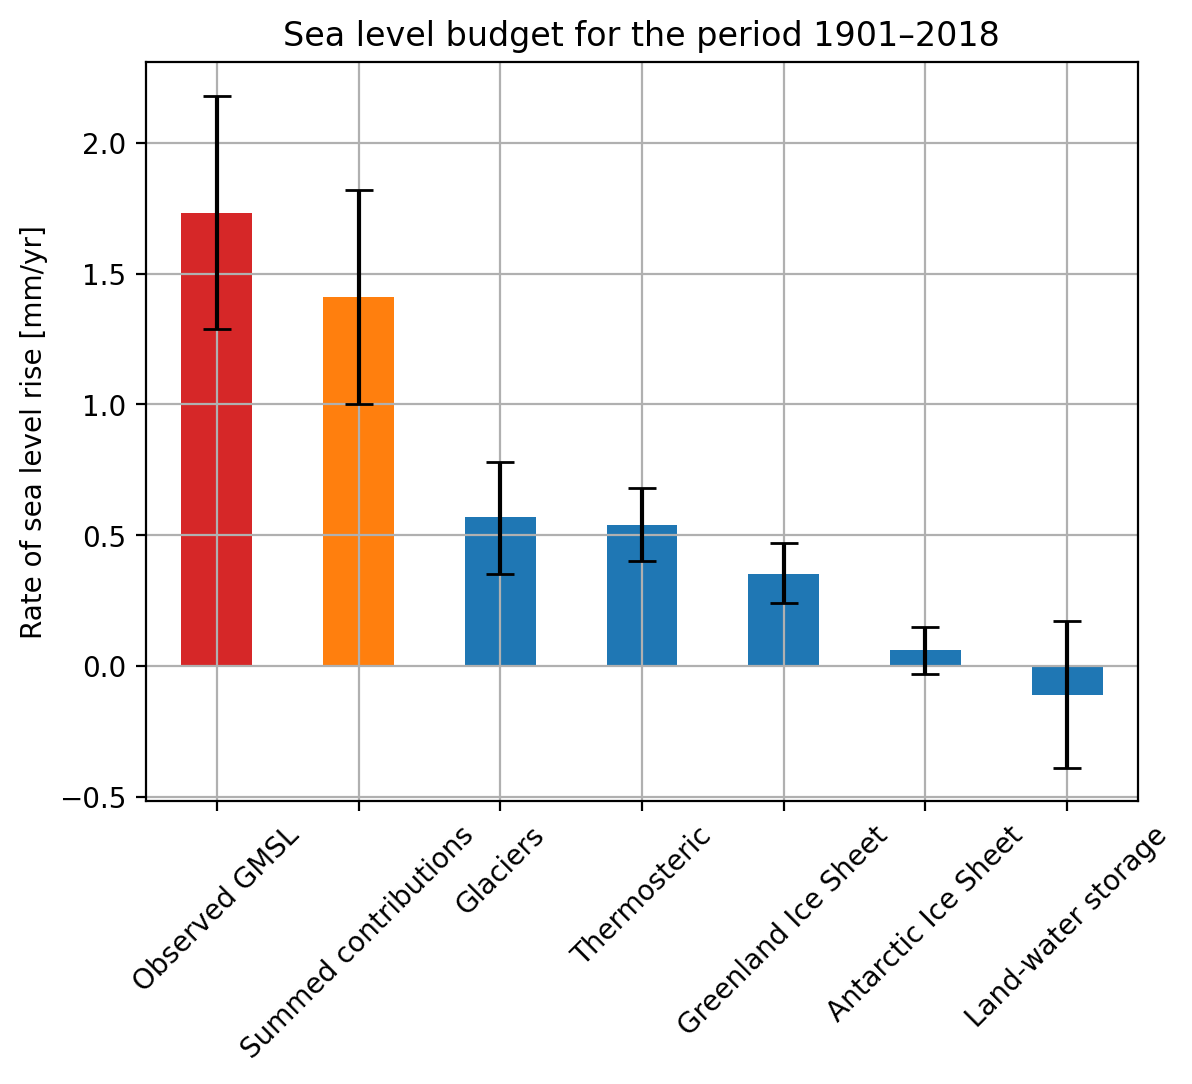

In [140]:
period = "1901–2018"
AR6_mean_r[period].plot.bar(yerr=[AR6_95pc_r[period]-AR6_mean_r[period], 
                                  AR6_mean_r[period]-AR6_5pc_r[period]], 
                            title=f"Sea level budget for the period {period}",
                           capsize=5,
                           color=bar_colors)
plt.grid()
plt.ylabel("Rate of sea level rise [mm/yr]")
plt.xticks(rotation=45)

plt.savefig(f'../figures/GlobalSeaLevelBudget_AR6.pdf', dpi=150, bbox_inches = "tight");